# Theory Questions

Q1. When should you use classification over regression ?

Classification is used when the output variable is a category such as “red” or “blue”, “spam” or “not spam”. It is used to draw a conclusion from observed values. Differently from, regression which is used when the output variable is a real or continuous value like “age”, “salary”, etc. When we must identify the class, the data belongs to we use classification over regression. Like when you must identify whether a name is male or female instead of finding out how they are correlated with the person.

<br><br>

Q2. How do you deal with the class imbalance in a classification problem ?

- Collect More Data
- Change Your Performance Metric
- Resample Your Dataset
- Generate Synthetic Samples
- Try Different Algorithms
- Try Penalized Models
- Try breaking the problem into smaller problems

<br><br>

Q3. What is a confusion matrix and why do you need it ?

Confusion matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.
<br>
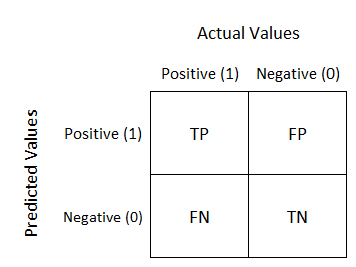
<br>
It is extremely useful for measuring Recall, Precision, Specificity, Accuracy, and most importantly AUC-ROC curves.

<br><br>

Q4. What is the difference between sigmoid and softmax function ?

The sigmoid function is used for the two-class logistic regression, whereas the softmax function is used for the multiclass logistic regression (a.k.a. MaxEnt, multinomial logistic regression, softmax Regression, Maximum Entropy Classifier).
<br><br>
In the two-class logistic regression, the predicted probablies are as follows, using the sigmoid function:
<br>
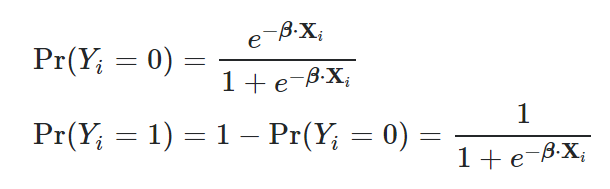
<br><br>
In the multiclass logistic regression, with K classes, the predicted probabilities are as follows, using the softmax function:
<br>
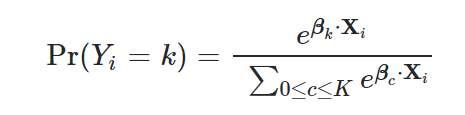

<br><br>

Q5. Why is logistic regression a type of classification technique and not a regression? Name the
function it is derived from?

Contrary to popular belief, logistic regression IS a regression model. The model builds a regression model to predict the probability that a given data entry belongs to the category numbered as “1”. Just like Linear regression assumes that the data follows a linear function, Logistic regression models the data using the sigmoid function.
<br>
The Logistic Regression can be explained with Logistic function, also known as Sigmoid function that takes any real input x, and outputs a probability value between 0 and 1 which is defined as,
<br>
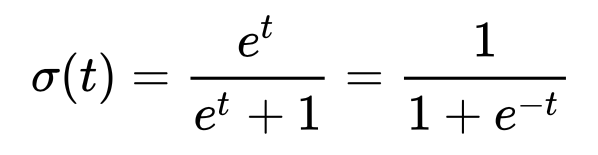
<br>
The model fit using the above Logistic function can be seen as below:
<br>
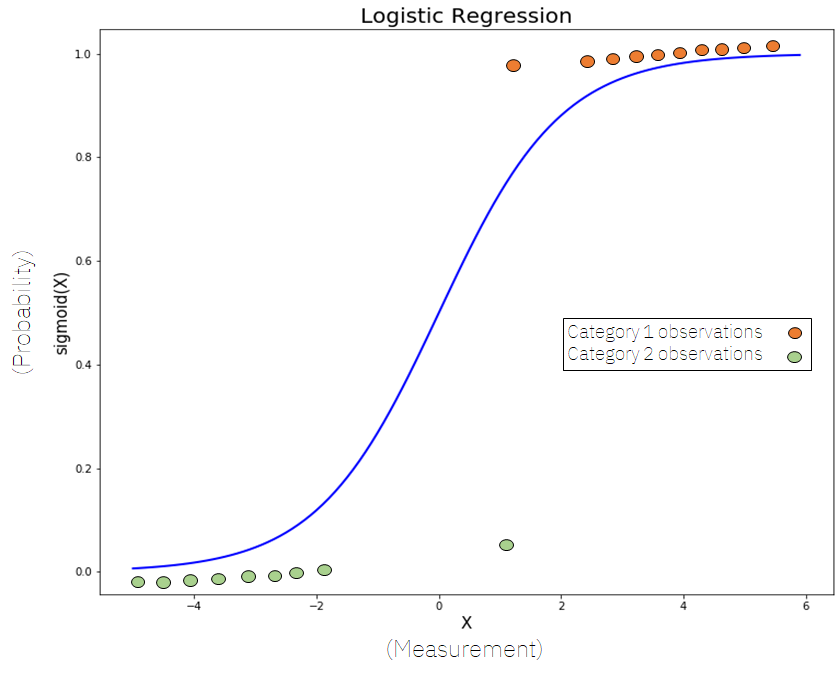
<br>
Further, for any given independent variable t, let us consider it as a linear function in a univariate regression model, where β0 is the intercept and β1 is the slope and is given by,
<br>
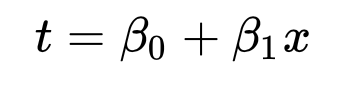
<br>
The general Logistic function p which outputs a value between 0 and 1 will become,
<br>
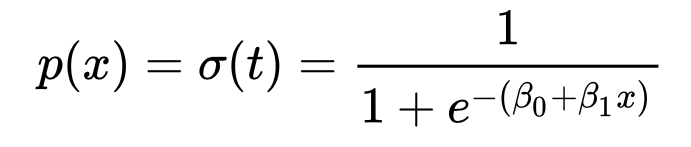
<br>
We can see that the data separable into two classes can be modelled using a Logistic function for the given variable in a linear function. But the relation between the input variable x and output probability cannot be interpreted easily which is given by the sigmoid function, we introduce the Logit (log-odds) function now that makes this model interpretable in a linear fashion.

<br><br>

# Simple Classification with Python

Implement the <b>Simple classification</b> algorithm over the dataset given below:

[Download Dogs vs Cats Dataset](https://www.kaggle.com/c/dogs-vs-cats/data)

[Reference](https://www.geeksforgeeks.org/project-idea-cat-vs-dog-image-classifier-using-cnn-implemented-using-keras/)

### Importing necessary packages

In [1]:
import os
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
filenames = os.listdir("data/cats_dogs/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == "dog":
        categories.append(1)  # 1 for dog
    elif category == "cat":
        categories.append(0)  # 0 for cat'

print("Found %d files. Splitted into 2 categories (%d)"%(len(filenames), len(categories)))

# Creatinf a dataframe
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

Found 25000 files. Splitted into 2 categories (25000)


In [3]:
df.head()

filename  category
0     cat.0.jpg         0
1     cat.1.jpg         0
2    cat.10.jpg         0
3   cat.100.jpg         0
4  cat.1000.jpg         0

In [4]:
df.tail()

filename  category
24995  dog.9995.jpg         1
24996  dog.9996.jpg         1
24997  dog.9997.jpg         1
24998  dog.9998.jpg         1
24999  dog.9999.jpg         1

In [5]:
df.category.value_counts()

0    12500
1    12500
Name: category, dtype: int64

In [6]:
df.category.value_counts().plot.bar()

<AxesSubplot:>

In [7]:
# Training Data, 12000 cats and 12000 dogs

In [8]:
# Sample Image
sample = random.choice(filenames)
image = load_img('data/cats_dogs/train/' + sample)
plt.imshow(image)

### Build Model

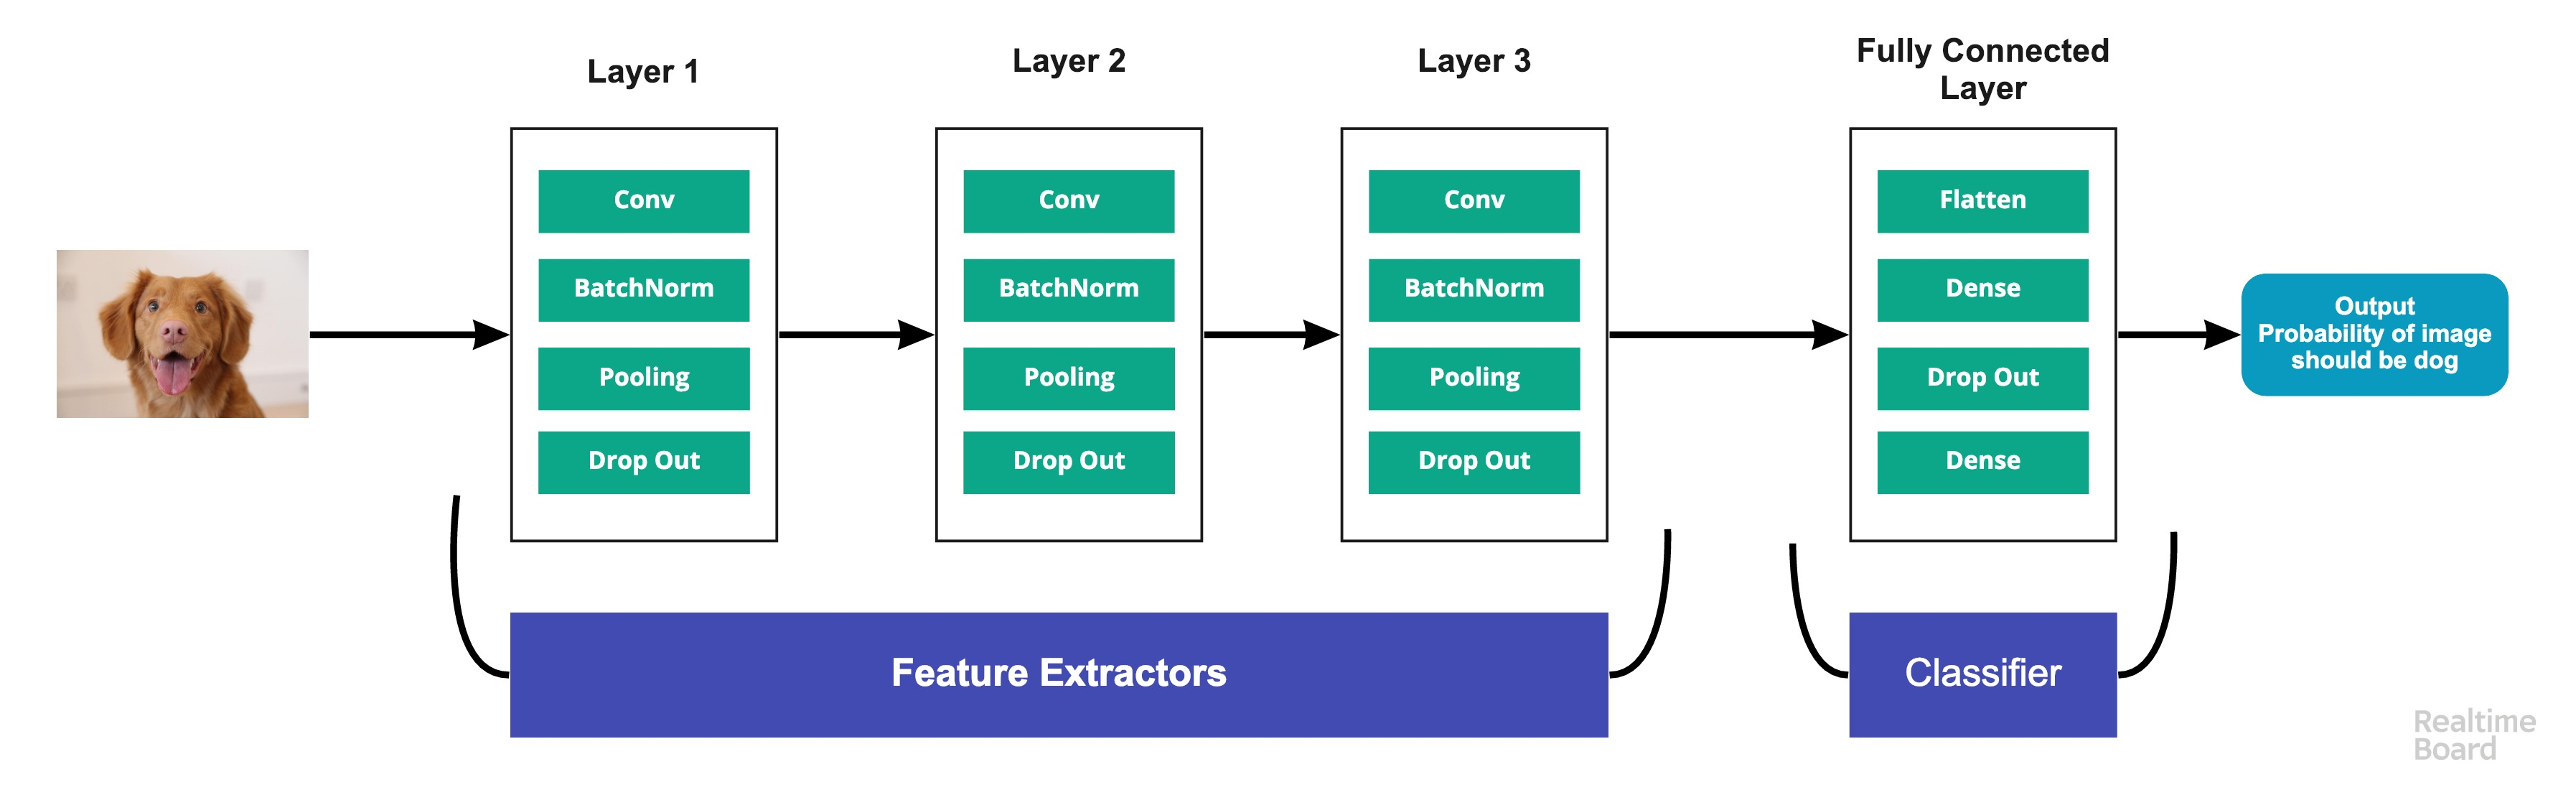

In [9]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [10]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [11]:
# Using EarlyStopping to prevent overfitting
earlystop = EarlyStopping(patience=10) # stop after 10 epochs if val_loss is not decreased.

# Reduce learning rate if accuracy not increase for 2 steps
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)  

callbacks = [earlystop, learning_rate_reduction]

In [12]:
# Converting 1 to dogs and 0 to cats
df.category = df.category.replace({0: 'cat', 1: 'dog'})

In [13]:
df.category

0        cat
1        cat
2        cat
3        cat
4        cat
        ... 
24995    dog
24996    dog
24997    dog
24998    dog
24999    dog
Name: category, Length: 25000, dtype: object

In [14]:
train_df, test_df = train_test_split(df, test_size = 0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [15]:
train_df['category'].value_counts()

dog    10015
cat     9985
Name: category, dtype: int64

In [16]:
train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

In [17]:
test_df['category'].value_counts()

cat    2515
dog    2485
Name: category, dtype: int64

In [18]:
test_df['category'].value_counts().plot.bar()

<AxesSubplot:>

In [19]:
total_train = train_df.shape[0]
total_test = test_df.shape[0]
batch_size=15

In [20]:
# Model Train generator

In [21]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "data/cats_dogs/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [22]:
# Model Test generator

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    "data/cats_dogs/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [24]:
## See how our generator work

In [25]:
example_df = train_df.sample(n=1).reset_index(drop=True)
print(example_df)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "data/cats_dogs/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

        filename category
0  cat.11861.jpg      cat
Found 1 validated image filenames belonging to 1 classes.


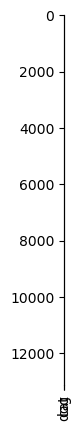

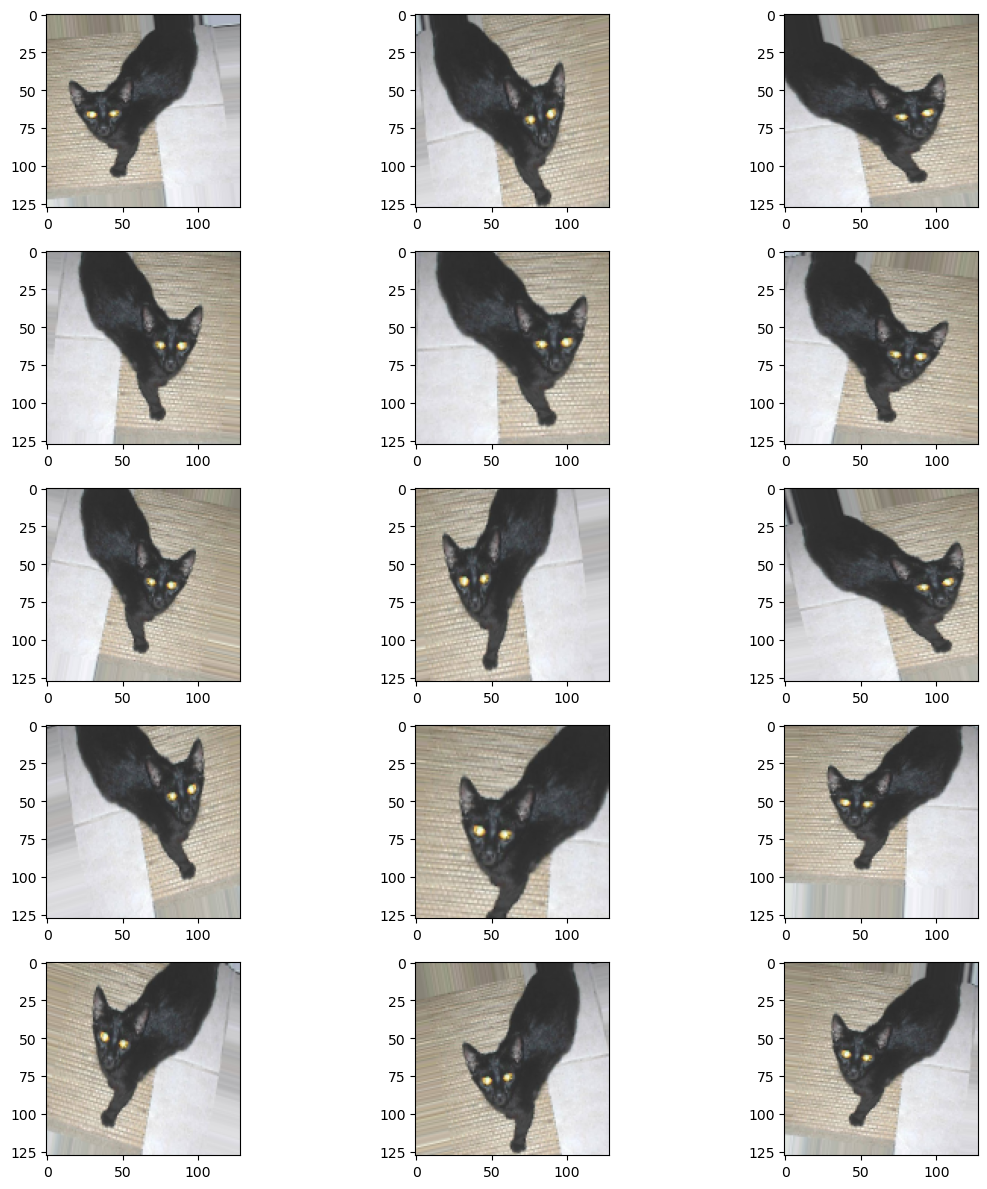

In [26]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [27]:
## Fitting the model

In [28]:
epochs=3 if FAST_RUN else 50
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=total_test//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
1333/1333 [==============================] - 446s 335ms/step - loss: 0.7543 - accuracy: 0.6353 - val_loss: 0.7210 - val_accuracy: 0.6649
Epoch 2/50
1333/1333 [==============================] - 441s 331ms/step - loss: 0.5533 - accuracy: 0.7278 - val_loss: 0.7701 - val_accuracy: 0.6206
Epoch 3/50
1333/1333 [==============================] - 428s 321ms/step - loss: 0.5006 - accuracy: 0.7646 - val_loss: 0.5596 - val_accuracy: 0.7708
Epoch 4/50
1333/1333 [==============================] - 427s 320ms/step - loss: 0.4649 - accuracy: 0.7854 - val_loss: 0.8129 - val_accuracy: 0.7630
Epoch 5/50
1333/1333 [==============================] - 427s 320ms/step - loss: 0.4410 - accuracy: 0.7981 - val_loss: 0.4048 - val_accuracy: 0.8186
Epoch 6/50
1333/1333 [==============================] - 427s 320ms/step - loss: 0.4266 - accuracy: 0.8073 - val_loss: 0.3339 - val_accuracy: 0.8557
Epoch 7/50
1333/1333 [==============================] - 428s 321ms/step - loss: 0.4064 - accuracy: 0.8178 - val_

1333/1333 [==============================] - 457s 343ms/step - loss: 0.2688 - accuracy: 0.8861 - val_loss: 0.2086 - val_accuracy: 0.9143
Epoch 49/50
1333/1333 [==============================] - 455s 341ms/step - loss: 0.2711 - accuracy: 0.8883 - val_loss: 0.2132 - val_accuracy: 0.9145
Epoch 50/50
1333/1333 [==============================] - 456s 342ms/step - loss: 0.2698 - accuracy: 0.8880 - val_loss: 0.2115 - val_accuracy: 0.9149


In [29]:
model.save_weights("model_dogs_cats.h5")

In [42]:
model_json = model.to_json()
with open("model_dogs_cats.json","w") as json_file:
  json_file.write(model_json)

In [30]:
#Virtualize Training

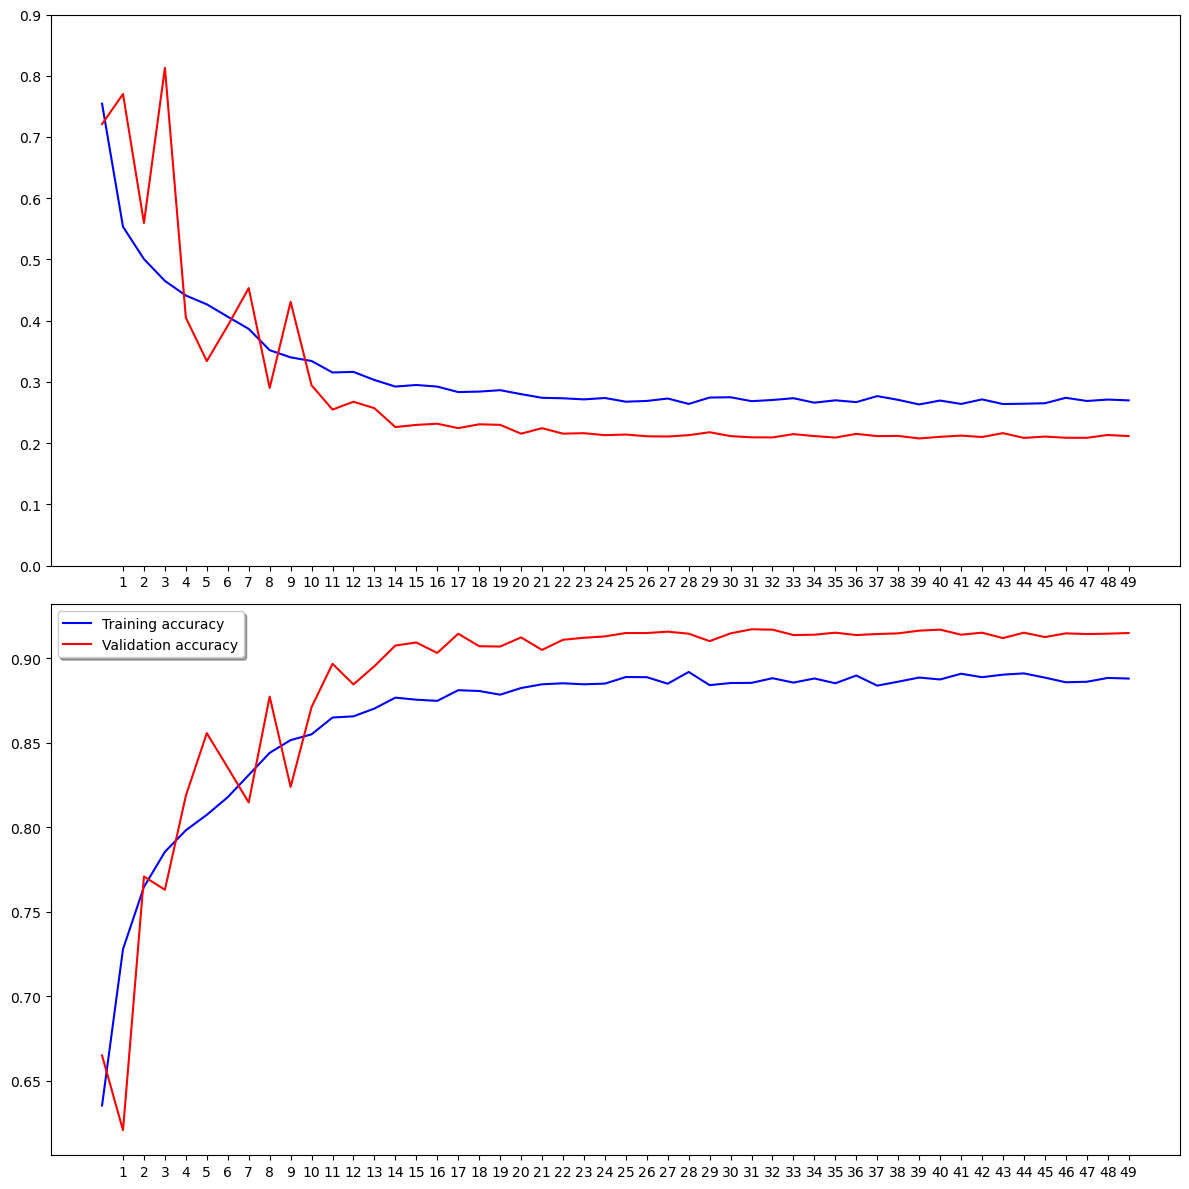

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [32]:
## Preparing Testing Data

In [33]:
test_filenames = os.listdir("data/cats_dogs/test/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [34]:
## Create Testing Generator
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "data/cats_dogs/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [35]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [36]:
test_df['category'] = np.argmax(predict, axis=-1)

We will convert the predict category back into our generator classes by using train_generator.class_indices. It is the classes that image generator map while converting data into computer vision

In [37]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

From our prepare data part. We map data with {1: 'dog', 0: 'cat'}. Now we will map the result back to dog is 1 and cat is 0

In [38]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

Virtaulize Result

In [39]:
test_df['category'].value_counts()

1    6482
0    6018
Name: category, dtype: int64

In [40]:
test_df['category'].value_counts().plot.bar()

<AxesSubplot:>

See predicted result with images

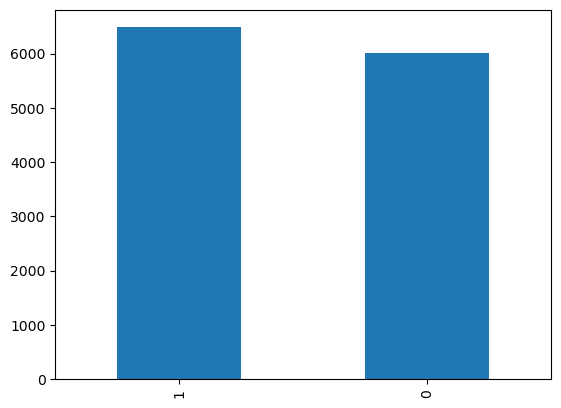

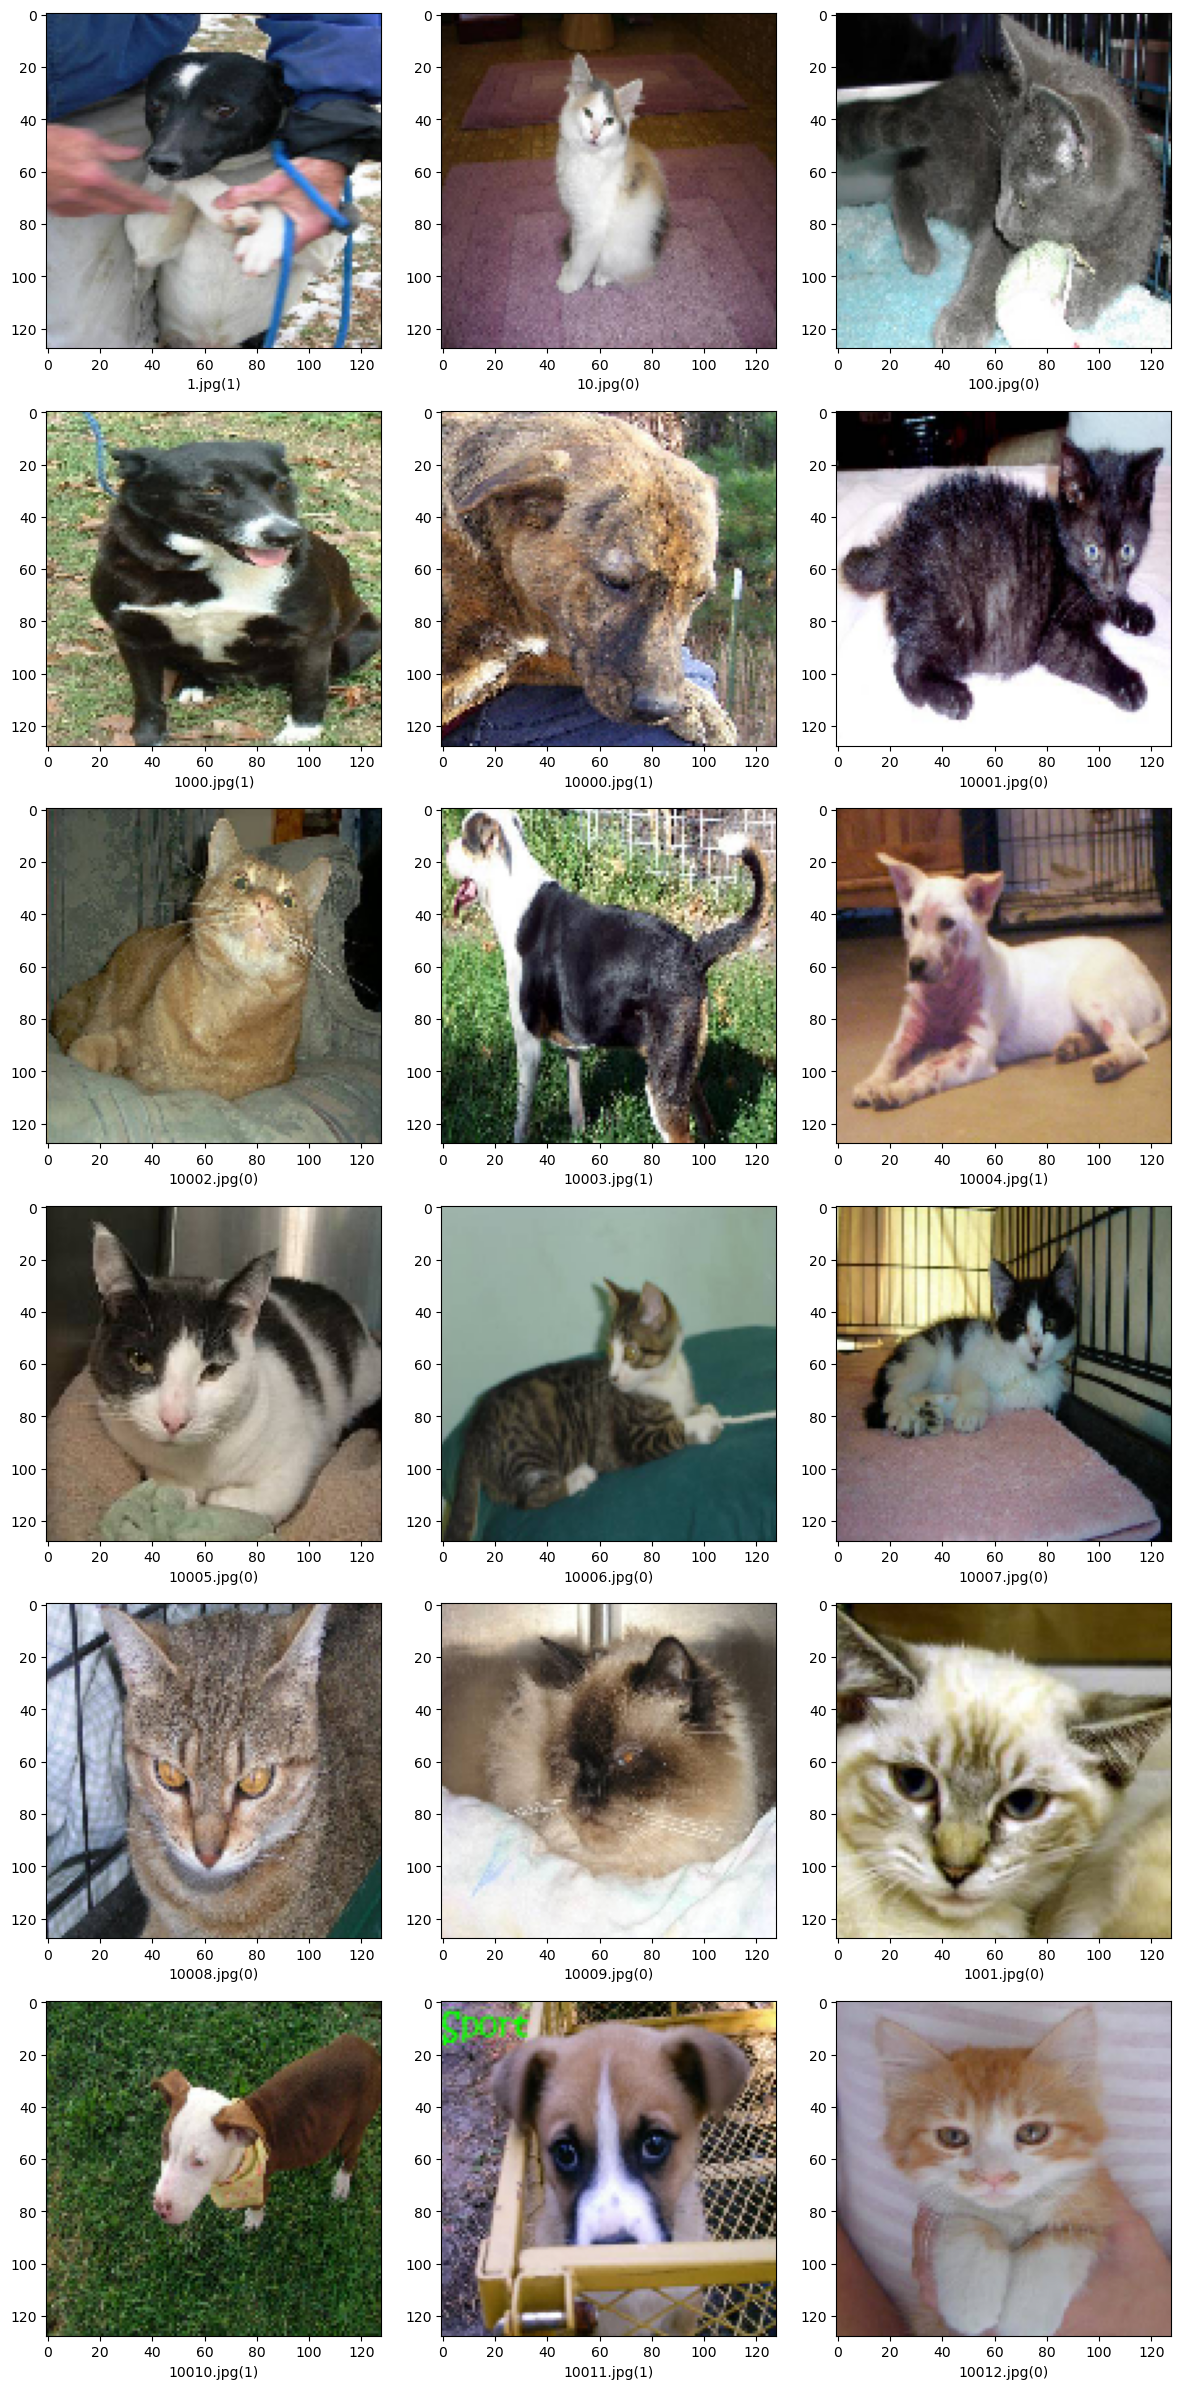

In [41]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("data/cats_dogs/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()